In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [6]:
file_path_train = 'train.csv'
file_path_test = 'test.csv'

train = pd.read_csv(file_path_train)
test = pd.read_csv(file_path_test)

print(train)
print(test)

test = test.dropna(axis=0).reset_index(drop=True)
train = train.dropna(axis=0).reset_index(drop=True)

print("\n\nEdited:")
print(train)
print(test)

          ID  Gender Ever_Married  Age Graduated     Profession  \
0     462809    Male           No   22        No     Healthcare   
1     462643  Female          Yes   38       Yes       Engineer   
2     466315  Female          Yes   67       Yes       Engineer   
3     461735    Male          Yes   67       Yes         Lawyer   
4     462669  Female          Yes   40       Yes  Entertainment   
...      ...     ...          ...  ...       ...            ...   
8063  464018    Male           No   22        No            NaN   
8064  464685    Male           No   35        No      Executive   
8065  465406  Female           No   33       Yes     Healthcare   
8066  467299  Female           No   27       Yes     Healthcare   
8067  461879    Male          Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                 1.0            Low          4.0  Cat_4            D  
1                 NaN        Average          3.0  

#Task 1

a) The target variable in the dataset is the "Segmentation" column

b) Вataset is usable, but before using it you need to process it and remove null/nan values

c)

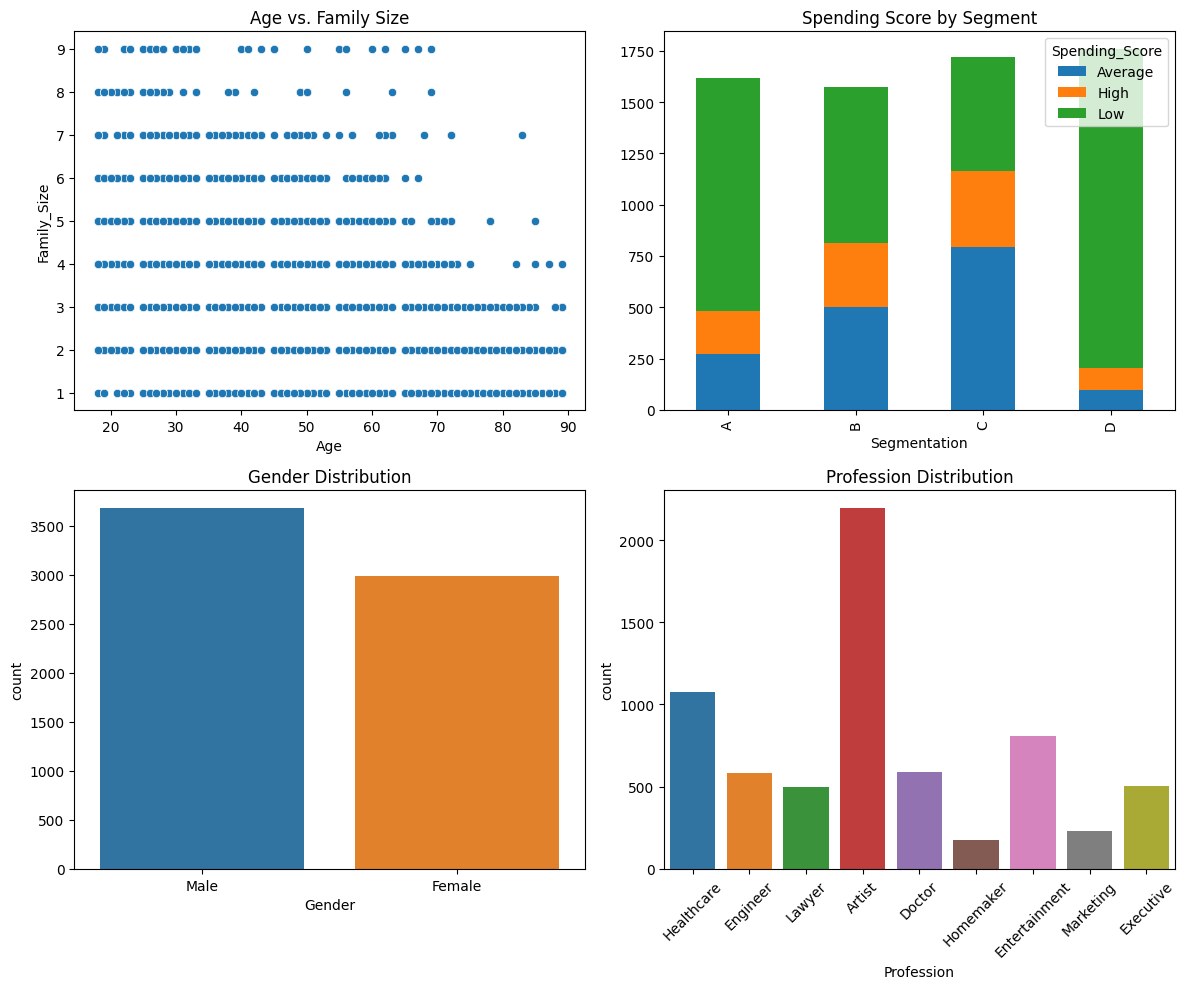

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=train, x='Age', y='Family_Size', ax=axes[0, 0])
axes[0, 0].set_title('Age vs. Family Size')

segment_spending = train.groupby(['Segmentation', 'Spending_Score']).size().unstack()
segment_spending.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Spending Score by Segment')

sns.countplot(data=train, x='Gender', ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')

sns.countplot(data=train, x='Profession', ax=axes[1, 1])
axes[1, 1].set_title('Profession Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#Task 2

In [7]:
train.drop(columns='ID', inplace=True)
print(train)

le = LabelEncoder()

list = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation']

for i in list:
    train[i] = le.fit_transform(train[i])

print(train)

numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
train[numeric_columns] = scaler.fit_transform(train[numeric_columns])

print(train)

features = train.drop('Segmentation', axis=1)
target = train['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

      Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0       Male           No   22        No  Healthcare              1.0   
1     Female          Yes   67       Yes    Engineer              1.0   
2       Male          Yes   67       Yes      Lawyer              0.0   
3       Male          Yes   56        No      Artist              0.0   
4       Male           No   32       Yes  Healthcare              1.0   
...      ...          ...  ...       ...         ...              ...   
6660    Male          Yes   41       Yes      Artist              0.0   
6661    Male           No   35        No   Executive              3.0   
6662  Female           No   33       Yes  Healthcare              1.0   
6663  Female           No   27       Yes  Healthcare              1.0   
6664    Male          Yes   37       Yes   Executive              0.0   

     Spending_Score  Family_Size  Var_1 Segmentation  
0               Low          4.0  Cat_4            D  
1            

#Task 3

In [16]:
model = Sequential()

# Input layer
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers
model.add(Dense(24, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Task 4

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/20
167/167 [==============================] - 1s 3ms/step - loss: 1.3000 - accuracy: 0.4139 - val_loss: 1.1998 - val_accuracy: 0.4501
Epoch 2/20
167/167 [==============================] - 0s 2ms/step - loss: 1.1510 - accuracy: 0.4848 - val_loss: 1.1357 - val_accuracy: 0.4989
Epoch 3/20
167/167 [==============================] - 0s 1ms/step - loss: 1.1158 - accuracy: 0.5088 - val_loss: 1.1230 - val_accuracy: 0.5071
Epoch 4/20
167/167 [==============================] - 0s 2ms/step - loss: 1.1013 - accuracy: 0.5150 - val_loss: 1.1160 - val_accuracy: 0.5101
Epoch 5/20
167/167 [==============================] - 0s 2ms/step - loss: 1.0919 - accuracy: 0.5199 - val_loss: 1.1160 - val_accuracy: 0.5139
Epoch 6/20
167/167 [==============================] - 0s 2ms/step - loss: 1.0840 - accuracy: 0.5233 - val_loss: 1.1106 - val_accuracy: 0.5094
Epoch 7/20
167/167 [==============================] - 0s 2ms/step - loss: 1.0801 - accuracy: 0.5255 - val_loss: 1.1078 - val_accuracy: 0.5101
Epoch 

#Task 5

42/42 [==============================] - 0s 1ms/step - loss: 1.0996 - accuracy: 0.5184
Test Loss: 1.0996
Test Accuracy: 0.5184


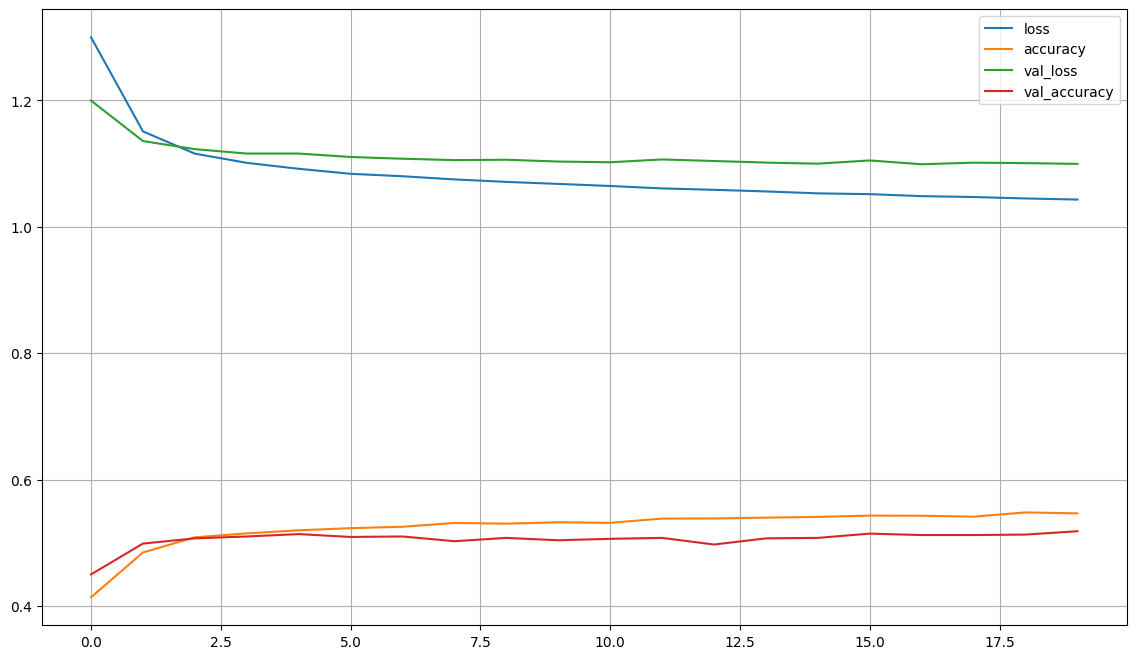

In [18]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

pd.DataFrame(history.history).plot(figsize=(14, 8))
plt.grid(True)
plt.show()